# Demo4: kmean進一步解析


In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

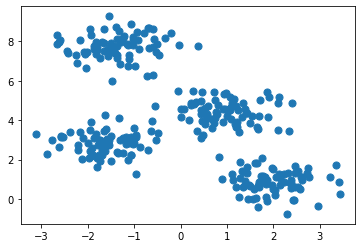

In [5]:
from sklearn.datasets import make_blobs #產生高斯分布資料的套件: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:, 1], s=50)

In [6]:
# 美化用
import seaborn as sns; sns.set()

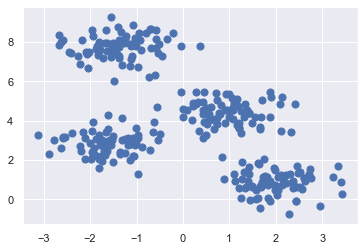

In [7]:
plt.scatter(X[:,0], X[:, 1], s=50)

In [8]:
# 回憶一下
X_test = [[1, 10],
          [2, 20],
          [3, 30]]
X_test = np.array(X_test)
X_test

array([[ 1, 10],
       [ 2, 20],
       [ 3, 30]])

In [9]:
print('X_test[:,0] = ', X_test[:,0])
print('X_test[:,1] = ', X_test[:,1])

X_test[:,0] =  [1 2 3]
X_test[:,1] =  [10 20 30]


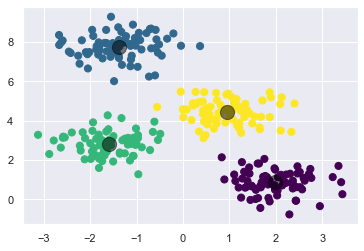

In [10]:
from sklearn.cluster import KMeans

#kmeans = KMeans(n_clusters=4, init='k-means++')
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

y_kmeans = kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5)

In [11]:
kmeans.cluster_centers_

array([[ 1.98258281,  0.86771314],
       [-1.37324398,  7.75368871],
       [-1.58438467,  2.83081263],
       [ 0.94973532,  4.41906906]])

### 畫Elbow plot檢驗k值

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


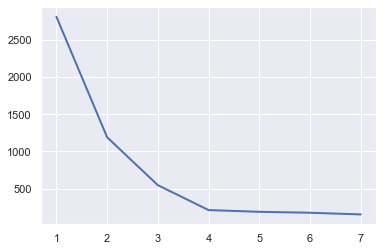

In [12]:
wcss = []
for k in range(1,8):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,8), wcss, linewidth = 2)
plt.xlabel='K'
plt.ylabel='WCSS'